# Linear Regression

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


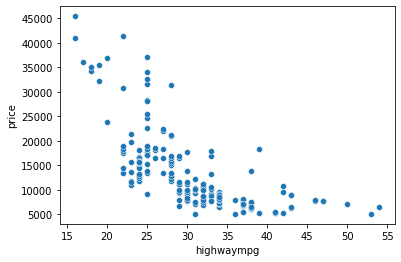

In [ ]:
sns.scatterplot(x='highwaympg',y='price',data=df)

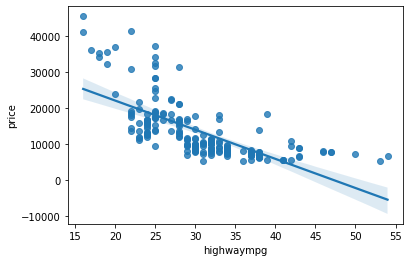

In [ ]:
sns.regplot(x='highwaympg',y='price',data=df)

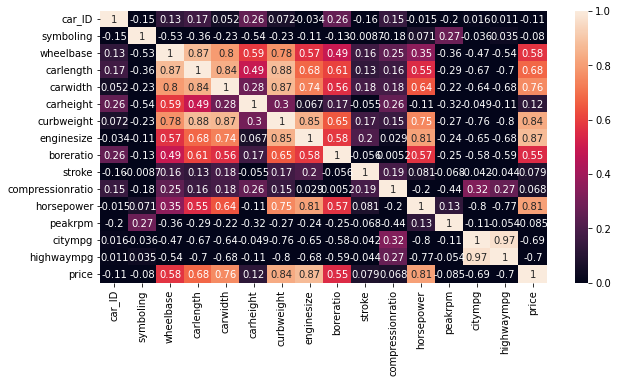

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [ ]:
# pendifinisian x dan y
X = df[['highwaympg']]
y = df['price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc=MinMaxScaler()
sc.fit(X)
x_scaled=sc.transform(X)

In [ ]:
X.shape

(205, 1)

In [ ]:
X_train_surge=np.array(X)

In [ ]:
x_scaled.shape

(205, 1)

In [ ]:
X_final = np.concatenate([x_scaled,X], axis=1)

In [ ]:
X_final.shape

(205, 2)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=101)

## Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, )

## Train Model

In [ ]:
mod=model.fit(X_train,y_train)

In [ ]:
y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

## Evaluation Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4457.339035803808
MAE test =  3663.557414534719
MSE train =  35116752.91840222
MSE test =  23239029.4208921
RMSE train =  5925.938990438749
RMSE test =  4820.687650210507
r2score train =  0.49177190516957126
r2score test =  0.3063883252583228


## Coefficients

In [ ]:
mod.coef_

array([-31511.29995375])

In [ ]:
mod.intercept_

25853.978455810204

In [ ]:
coeff_df = pd.DataFrame(mod.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highwaympg,-829.244736


In [ ]:
X.head()

,highwaympg
0,27
1,27
2,26
3,30
4,22


# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
poly_features = poly.fit_transform(X_train)

In [ ]:
poly_feature_test = poly.transform(X_test)

In [ ]:
poly_features.shape

(164, 3)

In [ ]:
X_train.shape

(164, 1)

## Model Definition & Train Model

In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [ ]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

## Evaluation Model

matrics with polynomial

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  3222.674799203901
MAE test =  2671.147730280194
MSE train =  23379357.071415033
MSE test =  16086062.052906144
RMSE train =  4835.220478056304
RMSE test =  4010.743329222919
r2score train =  0.6616416634426634
r2score test =  0.5198818230126214


matrics with linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4457.339035803808
MAE test =  3663.557414534719
MSE train =  35116752.91840222
MSE test =  23239029.4208921
RMSE train =  5925.938990438749
RMSE test =  4820.687650210507
r2score train =  0.49177190516957126
r2score test =  0.3063883252583228


# Ridge Regression (L2)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1000)

In [ ]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=1000)

In [ ]:
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  6164.6798461308135
MAE test =  5666.639883566574
MSE train =  68718229.15216361
MSE test =  42822930.94469223
RMSE train =  8289.645900288118
RMSE test =  6543.923207426278
r2score train =  0.005473690483967064
r2score test =  -0.27812931908388405


# Lasso Regerssion (L1)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  4457.122195366533
MAE test =  3664.4292366092636
MSE train =  35116782.140624695
MSE test =  23232681.2389779
RMSE train =  5925.941456057822
RMSE test =  4820.029174079541
r2score train =  0.4917714822502174
r2score test =  0.30657779845056876


# Elastic Net (L3)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet()

In [ ]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [ ]:
elastic_pred_train = elastic_model.predict(X_train)
elastic_pred_test = elastic_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

MAE train =  5960.432255318929
MAE test =  5509.037712500955
MSE train =  64884489.80008111
MSE test =  40210578.149235405
RMSE train =  8055.090924383232
RMSE test =  6341.181132031745
r2score train =  0.06095758022493181
r2score test =  -0.20015883397214584


# Logistic Regression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/mushrooms.csv')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
X = df.drop('class',axis=1)
y = df['class']

## Train Test Split & Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
enc = OneHotEncoder()
enc.fit(X_train)

OneHotEncoder()

In [ ]:
X_enc=enc.transform(X_train).toarray()
X_enc_test=enc.transform(X_test).toarray()

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_enc,y_train)

LogisticRegression()

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
y_pred_train = log_model.predict(X_enc)
y_pred_test = log_model.predict(X_enc_test)

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  1.0
accuracy score test :  1.0


In [ ]:
log_model.classes_

array(['e', 'p'], dtype=object)

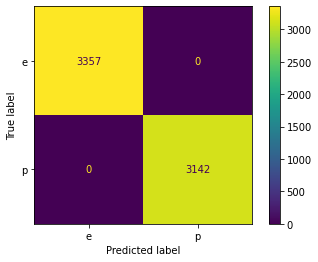

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

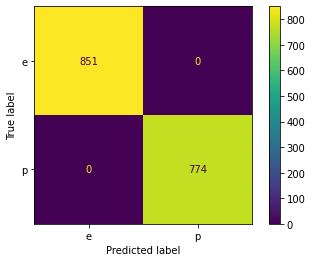

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3357
           p       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



# Multiclass LogReg

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


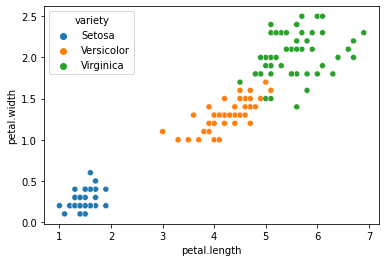

In [ ]:
sns.scatterplot(x='petal.length',y='petal.width',data=df,hue='variety')

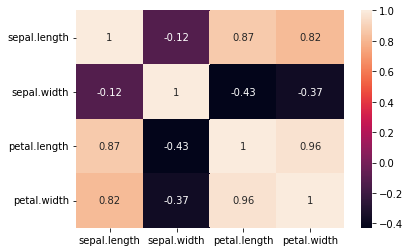

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('variety',axis=1)
y = df['variety']

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
logreg_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [ ]:
prob=logreg_model.predict_proba(X_test)

In [ ]:
logreg_pred_test

array(['Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor'], dtype=object)

## Evaluation Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

accuracy score train :  0.9642857142857143
accuracy score test :  1.0


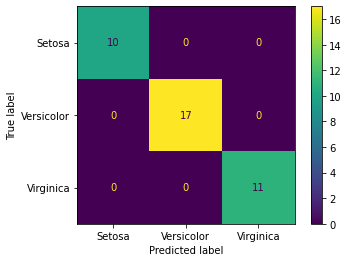

In [ ]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

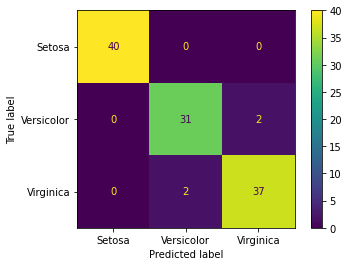

In [ ]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train,logreg_pred_train))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.94      0.94      0.94        33
   Virginica       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
print(classification_report(y_test,logreg_pred_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        17
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

